<a href="https://colab.research.google.com/github/lisaong/stackup-workshops/blob/text101b/text-similarity/text_processing101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing 101 Demo Notebook

Useful references:
- spacy documentation: https://spacy.io/usage
- spacy cheatsheet: https://www.datacamp.com/community/blog/spacy-cheatsheet
- matplotlib cheatsheet: https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet
- seaborn cheatsheet: https://www.datacamp.com/community/blog/seaborn-cheat-sheet-python

## Part 1 - Text Processing

1. Load a language model
2. Tokenise the text
3. Clean and Explore the text


### Language models

Install spacy language models for:
- English
- Chinese

Language models come in different sizes, larger models include more words. Each language is trained on a different corpus (large collections of text from web, conversations, newspapers, etc).

For example:

| Model | English (OntoNotes, Common Crawl) | Chinese (OntoNotes) |
|--|--|--|
| Small | 11MB | 45MB|
| Medium | 45MB | 75MB |
| Large | 746MB | 575MB |

Full list here: https://spacy.io/usage/models

In [1]:
# Instal spacy 2.3 so that we can use Chinese models
!pip install spacy==2.3

     |████████████████████████████████| 10.0MB 126kB/s 
     |████████████████████████████████| 2.1MB 44.8MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
# We will load the medium-sized model, which will include word vectors
# word vectors are useful in Part 2 for finding the meaning of a text sequence
!python -m spacy download en_core_web_md

     |████████████████████████████████| 50.8MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.3.0-cp36-none-any.whl size=50921515 sha256=f19afc784f5dfcf91c1d90e2e1f8f03246564871febfce1ba0b535c16509bb67
  Stored in directory: /tmp/pip-ephem-wheel-cache-9zvbtip7/wheels/0d/1f/15/ea2b10dec65de31d56a2b3f383f4e21e1e6358f27877853fbb
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [3]:
# do the same for the Chinese model
!python -m spacy download zh_core_web_md

     |████████████████████████████████| 78.9MB 1.2MB/s 
     |████████████████████████████████| 48.8MB 74.7MB/s 
  Created wheel for zh-core-web-md: filename=zh_core_web_md-2.3.1-cp36-none-any.whl size=78733266 sha256=8bf09b5c0196c7f4e06efbbb817adc773e10d39a3d16e4f9bc5ed80ac6afbbf8
  Stored in directory: /tmp/pip-ephem-wheel-cache-yfhwvcs4/wheels/8a/38/cf/bde95f3f103e5a7ba7e719f318cb3933577cfe3e3f19eab222
  Created wheel for pkuseg: filename=pkuseg-0.0.25-cp36-cp36m-linux_x86_64.whl size=50131897 sha256=66cbe3ec2f081dad5731387744ccb8485e44777b4577f49c89752def97170a8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yfhwvcs4/wheels/7b/e1/23/a7ad8a65e052b7961808cc7d17236f6ba92fc451327f13f3f9
Successfully built zh-core-web-md pkuseg
✔ Download and installation successful
You can now load the model via spacy.load('zh_core_web_md')


### Restart the Runtime
In order for the language models to load, we need to restart the Colab runtime.

Runtime -> Restart Runtime

This reuses the same cloud machine, but restarts Python so that it can find the new models.

Otherwise you get this error: `OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.`

Once runtime is restarted, continue with the cells below.


In [2]:
import spacy

In [3]:
nlp_en = spacy.load("en_core_web_md")
nlp_zh = spacy.load("zh_core_web_md")

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.986 seconds.
Prefix dict has been built successfully.


### Tokenise some text

We'll try both English and Chinese text from news articles.

Note that the language models are not interchangeable (different vocabulary, tokenisation, linguistic features).

Simple tokenisations:
1. Tokenise by word, or
2. Tokenise by sentence

Here's an example of tokenisation by word:

![stringstore](https://github.com/lisaong/stackup-workshops/raw/text101b/text-similarity/assets/vocab_stringstore.png)

(Image: https://course.spacy.io)

In [33]:
# Taken from: https://www.straitstimes.com/singapore/jobs-for-many-singaporeans-in-growing-infocomm-sector
text_en = """Jobs are available for Singaporeans in the infocommunications space over the next three years, with the Republic facing a huge shortage of professionals, said Minister-in-charge of the Smart Nation Initiative Vivian Balakrishnan.

Singaporeans can secure these well-paying jobs if they are prepared to train and reskill, said Dr Balakrishnan, who is also Foreign Minister, in an interview with The Straits Times.

He said digitalisation and disruption had already taken root when the current crisis struck. Covid-19 accelerated these trends.

While Singapore's immediate priority is to save jobs, that is not enough because "jobs are going to change", he added.
"""

# process using spaCy
doc_en = nlp_en(text_en)

In [34]:
# word tokenisation
[t for t in doc_en]

[Jobs,
 are,
 available,
 for,
 Singaporeans,
 in,
 the,
 infocommunications,
 space,
 over,
 the,
 next,
 three,
 years,
 ,,
 with,
 the,
 Republic,
 facing,
 a,
 huge,
 shortage,
 of,
 professionals,
 ,,
 said,
 Minister,
 -,
 in,
 -,
 charge,
 of,
 the,
 Smart,
 Nation,
 Initiative,
 Vivian,
 Balakrishnan,
 .,
 
 ,
 Singaporeans,
 can,
 secure,
 these,
 well,
 -,
 paying,
 jobs,
 if,
 they,
 are,
 prepared,
 to,
 train,
 and,
 reskill,
 ,,
 said,
 Dr,
 Balakrishnan,
 ,,
 who,
 is,
 also,
 Foreign,
 Minister,
 ,,
 in,
 an,
 interview,
 with,
 The,
 Straits,
 Times,
 .,
 
 ,
 He,
 said,
 digitalisation,
 and,
 disruption,
 had,
 already,
 taken,
 root,
 when,
 the,
 current,
 crisis,
 struck,
 .,
 Covid-19,
 accelerated,
 these,
 trends,
 .,
 
 ,
 While,
 Singapore,
 's,
 immediate,
 priority,
 is,
 to,
 save,
 jobs,
 ,,
 that,
 is,
 not,
 enough,
 because,
 ",
 jobs,
 are,
 going,
 to,
 change,
 ",
 ,,
 he,
 added,
 .,
 ]

In [31]:
# sentence tokenisation
[s for s in doc_en.sents]

[Jobs are available for Singaporeans in the infocommunications space over the next three years, with the Republic facing a huge shortage of professionals, said Minister-in-charge of the Smart Nation Initiative Vivian Balakrishnan.
 ,
 Singaporeans can secure these well-paying jobs if they are prepared to train and reskill, said Dr Balakrishnan, who is also Foreign Minister, in an interview with The Straits Times.
 ,
 He said digitalisation and disruption had already taken root when the current crisis struck.,
 Covid-19 accelerated these trends.
 ,
 While Singapore's immediate priority is to save jobs, that is not enough because "jobs are going to change", he added.]

In [35]:
# Taken from: https://www.zaobao.com.sg/zvideos/news/story20200621-1062143
text_zh = """今年的8月9日对林猷冠来说，将和往年大为不同。这位过去60年里每年都必定亲临现场为新加坡庆生的“最忠实出席者”，今年因国庆形式调整，首次无法到现场庆祝国庆。

林猷冠（75岁）不只每年看国庆，早年还是在庆典上亮相的表演者，每年表演醒狮。

70年代中期后，国庆庆典上的醒狮表演逐渐少了，林猷冠的身份也从表演者转为观众。但他对国庆的热忱不减，每年坚持到现场观看庆典。
"""

# parse using spaCy
doc_zh = nlp_zh(text_zh) 

In [36]:
# word tokenisation
[t for t in doc_zh]

[今年,
 的,
 8月,
 9日,
 对,
 林猷冠,
 来说,
 ，,
 将,
 和,
 往年,
 大为,
 不同,
 。,
 这位,
 过去,
 60年,
 里,
 每年,
 都,
 必定,
 亲临,
 现场,
 为,
 新加坡,
 庆生,
 的,
 “,
 最,
 忠实,
 出席者,
 ”,
 ，,
 今年,
 因,
 国庆,
 形式,
 调整,
 ，,
 首次,
 无法,
 到,
 现场,
 庆祝,
 国庆,
 。,
 
 ,
 林猷冠,
 （,
 75,
 岁,
 ）,
 不只,
 每年,
 看,
 国庆,
 ，,
 早年,
 还是,
 在,
 庆典,
 上,
 亮相,
 的,
 表演者,
 ，,
 每年,
 表演,
 醒狮,
 。,
 
 ,
 70年代,
 中期,
 后,
 ，,
 国庆,
 庆典,
 上,
 的,
 醒狮,
 表演,
 逐渐,
 少,
 了,
 ，,
 林猷冠,
 的,
 身份,
 也,
 从,
 表演者,
 转为,
 观众,
 。,
 但,
 他,
 对,
 国庆,
 的,
 热忱不减,
 ，,
 每年,
 坚持,
 到,
 现场,
 观看,
 庆典,
 。,
 ]

In [37]:
# sentence tokenisation
[s for s in doc_zh.sents]

[今年的8月9日对林猷冠来说，将和往年大为不同。,
 这位过去60年里每年都必定亲临现场为新加坡庆生的“最忠实出席者”，今年因国庆形式调整，首次无法到现场庆祝国庆。
 ,
 林猷冠（75岁）,
 不只每年看国庆，早年还是在庆典上亮相的表演者，每年表演醒狮。
 ,
 70年代中期后，国庆庆典上的醒狮表演逐渐少了，林猷冠的身份也从表演者转为观众。,
 但他对国庆的热忱不减，每年坚持到现场观看庆典。]

### Clean the text

Each document contains a list of tokens. We'll go through each of them and discard the tokens we don't need.

Q: How do we decide what we need or don't need?

A: This depends on what you are trying to build. For example, are punctuation or upper/lower-case important for understanding your text?

Commonly done:
- Remove punctuation
- Remove extra spaces (such as newlines)
- Remove very common words that don't add to meaning (aka. stop words)

Note: Casing is automatically handled by spaCy

In [38]:
# We will combine tokenisation and cleaning into a helper function so we
# can see end-to-end
def clean_text(text, nlp):
  """Takes in an input text and returns tokens after cleaning
  """
  doc = nlp(text)
  return [t for t in doc if not (t.is_punct 
    or t.is_space or t.is_stop)]

clean_text(text_en, nlp_en)

[Jobs,
 available,
 Singaporeans,
 infocommunications,
 space,
 years,
 Republic,
 facing,
 huge,
 shortage,
 professionals,
 said,
 Minister,
 charge,
 Smart,
 Nation,
 Initiative,
 Vivian,
 Balakrishnan,
 Singaporeans,
 secure,
 paying,
 jobs,
 prepared,
 train,
 reskill,
 said,
 Dr,
 Balakrishnan,
 Foreign,
 Minister,
 interview,
 Straits,
 Times,
 said,
 digitalisation,
 disruption,
 taken,
 root,
 current,
 crisis,
 struck,
 Covid-19,
 accelerated,
 trends,
 Singapore,
 immediate,
 priority,
 save,
 jobs,
 jobs,
 going,
 change,
 added]

In [39]:
clean_text(text_zh, nlp_zh)

[8月,
 9日,
 林猷冠,
 往年,
 大为,
 这位,
 60年,
 里,
 亲临,
 现场,
 新加坡,
 庆生,
 忠实,
 出席者,
 国庆,
 形式,
 调整,
 首次,
 现场,
 庆祝,
 国庆,
 林猷冠,
 75,
 岁,
 国庆,
 早年,
 庆典,
 亮相,
 表演者,
 表演,
 醒狮,
 70年代,
 中期,
 国庆,
 庆典,
 醒狮,
 表演,
 少,
 林猷冠,
 身份,
 表演者,
 转为,
 观众,
 国庆,
 热忱不减,
 现场,
 观看,
 庆典]

In [40]:
# checking the stop words

nlp_en.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

The stopwords lists are a set, so you can easily add/remove words to customise the stopwords for your needs.

More details are here:

https://stackoverflow.com/questions/41170726/add-remove-custom-stop-words-with-spacy


## Part 1b - Exploring Tokens
What else can we do with tokens? Internally, this is what spaCy does when you call nlp(text)

![nlp](https://github.com/lisaong/stackup-workshops/raw/text101b/text-similarity/assets/pipeline.png)

Besides tokens, spaCy also provides:
- Part of speech tagging
- Name entity recognition
- Dependency tree

Let's take a look at some attributes of a token: https://spacy.io/api/token#attributes

(Image: https://course.spacy.io)


In [43]:
# let's use the cleaned tokens
tokens_en = clean_text(text_en, nlp_en)
tokens_zh = clean_text(text_zh, nlp_zh)

In [44]:
def get_token_info(token):
  """Gets some information about any token"""
  print('Text:', token.text)
  print('Part of Speech (name, id):', token.pos_, token.pos)
  print('Syntatic dependency:', token.dep_)
  print('Syntatic Ancestors:', list(token.ancestors))
  print('Syntatic Children:', list(token.children))
  print('Word Vector:', list(token.vector))

In [51]:
get_token_info(tokens_en[0])

Text: Jobs
Part of Speech (name, id): NOUN 92
Syntatic dependency: nsubj
Syntatic Ancestors: [are, said]
Syntatic Children: []
Word Vector: [-0.40137, -0.19474, 0.19818, -0.54391, 0.5309, 0.21999, -0.32818, 0.17793, 0.016401, 2.8541, -0.72737, -0.16053, -0.36131, -0.23523, -0.22177, 0.057084, 0.35281, 1.3199, -0.057253, 0.13008, 0.41834, 0.13319, 0.0074174, -0.21275, -0.023246, 0.20783, -0.35368, 0.14472, 0.68741, 0.38607, -0.14863, 0.01487, -0.19167, -0.5062, 0.75318, 0.38715, -0.28412, 0.1147, -0.63108, -0.061117, 0.039542, -0.078562, 0.10637, -0.23889, -0.21867, -0.023955, 0.86638, -0.38597, 0.89935, -0.36541, -0.007828, 0.21034, 0.13718, -0.3254, -0.52749, 0.43597, 0.14639, 0.028763, 0.28184, -1.0619, -0.52786, -0.88469, -0.30208, 0.19786, 1.4698, 0.0067428, 0.30814, -0.051615, -0.096924, 0.43097, -0.19442, 0.13786, -0.32614, 0.052293, 0.18228, 0.87438, 0.30449, 0.075829, 0.72784, 0.30703, -0.023131, -0.16769, 0.28953, -0.68041, -0.43045, 0.32522, 0.25538, 1.0164, 0.3058, -0.55121,

In [52]:
get_token_info(tokens_en[1])

Text: available
Part of Speech (name, id): ADJ 84
Syntatic dependency: acomp
Syntatic Ancestors: [are, said]
Syntatic Children: [for]
Word Vector: [0.014507, -0.11624, 0.010342, -0.14761, 0.1576, -0.14334, 0.091898, -0.24521, -0.026863, 1.583, 0.023671, 0.56386, 0.013103, -0.35812, 0.29182, 0.086263, -0.02164, 2.3166, -0.076147, -0.53473, -0.89396, -0.15404, -0.17019, 0.019818, -0.10969, 0.22048, -0.085441, 0.00033733, 0.16612, -0.017404, 0.014849, -0.57812, 0.19454, -0.0040787, -0.38443, 0.036314, -0.17783, 0.136, 0.21289, 0.3293, -0.2546, 0.29294, -0.12063, -0.05737, -0.26232, 0.45102, 0.15652, -0.12469, 0.38356, -0.13506, -0.042586, -0.63343, -0.039293, 0.30387, 0.063688, -0.26632, -0.026717, -0.55038, -0.63944, -0.12253, 0.16655, -0.33855, 0.080006, 0.45584, 0.38396, 0.37248, -0.52798, 0.36999, -0.020948, 0.44524, -0.076609, -0.0076453, 0.81858, -0.31565, 0.53618, 0.25676, -0.0041489, 0.16316, 0.033448, 0.43533, -0.10441, 0.20812, -0.35925, 0.16069, -0.027052, -0.035009, -0.35581, 

In [53]:
get_token_info(tokens_zh[0])

Text: 8月
Part of Speech (name, id): NOUN 92
Syntatic dependency: compound:nn
Syntatic Ancestors: [9日, 不同]
Syntatic Children: []
Word Vector: [-0.91128, -2.6509, 3.6976, -3.1713, 4.8117, -1.656, -2.3266, 7.2307, 4.6191, -0.097682, -5.0225, -0.11716, 1.1935, -0.51917, -4.3766, -0.18002, 1.6073, 4.9088, -2.6837, 4.4773, -4.6425, 1.2229, 1.7836, 0.44313, 2.4923, 6.7588, -3.1278, -5.6155, -3.2504, -0.2284, -1.2825, 0.84207, 1.527, -1.2087, 0.62729, -2.7056, -3.4955, -7.602, -1.3812, 1.4504, 1.766, -1.3787, 1.6272, 1.7121, -2.8224, 4.7295, -4.8305, -2.3925, -0.80655, -0.81372, 0.43209, -3.4676, 3.2186, 10.491, -4.0767, -2.7056, -0.14365, -0.55266, 0.39485, -1.4152, 4.2886, -1.2944, -2.3571, -1.7825, -0.7717, 2.238, 3.6974, 0.091701, -3.9523, 4.634, 0.09359, 1.0207, -2.8256, 3.4699, 0.022762, -3.5618, 2.2222, -1.9482, -2.0209, -1.3345, 0.36243, 4.3488, -3.4396, 1.4275, -5.5295, -2.5989, -1.752, 1.5052, -0.053689, -1.3154, -9.5545, -5.4593, 4.2067, 4.3516, 3.165, 8.8794, 0.73182, 2.911, 1.41, 

### Part of Speech
Part of speech tags can be used as filters.

For example, you can use the same pattern that clean_text() used to extract just the nouns.

https://spacy.io/usage/linguistic-features#pos-tagging


In [57]:
def get_part_of_speech(text, nlp, pos):
  """Takes in an input text and returns only the nouns
  """
  doc = nlp(text)
  return [t for t in doc if t.pos_ == pos]

get_part_of_speech(text_en, nlp_en, pos="NOUN")

[Jobs,
 infocommunications,
 space,
 years,
 shortage,
 professionals,
 charge,
 jobs,
 interview,
 digitalisation,
 disruption,
 root,
 crisis,
 trends,
 priority,
 jobs,
 jobs]

In [58]:
get_part_of_speech(text_en, nlp_en, pos="ADJ")

[available, next, huge, prepared, current, immediate, enough]

In [63]:
# to see what part of speech can be found in a document
{t.pos_ for t in doc_zh}

{'ADJ',
 'ADP',
 'ADV',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SPACE',
 'VERB'}

In [66]:
get_part_of_speech(text_zh, nlp_zh, pos='PROPN')

[林猷冠, 新加坡, 林猷冠, 林猷冠]

In [67]:
# let's see how well this PoS tagging works
tricky_text_en = """
She thinks fast when she had a fast. The correct beat must be beat.
""" 

def get_pos(text, nlp):
  doc = nlp(text)
  return [(t.text, t.pos_) for t in doc]

get_pos(tricky_text_en, nlp_en)

[('\n', 'SPACE'),
 ('She', 'PRON'),
 ('thinks', 'VERB'),
 ('fast', 'ADV'),
 ('when', 'ADV'),
 ('she', 'PRON'),
 ('had', 'AUX'),
 ('a', 'DET'),
 ('fast', 'NOUN'),
 ('.', 'PUNCT'),
 ('The', 'DET'),
 ('correct', 'ADJ'),
 ('beat', 'NOUN'),
 ('must', 'VERB'),
 ('be', 'AUX'),
 ('beat', 'VERB'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE')]

## Part 1c - Exploring Entity Recognition

Entity Recognition can be done, but at the document level. This does not require tokenisation because spaCy already processed the text for you.

https://spacy.io/usage/linguistic-features#named-entities

We'll just do a quick demo using spacy's visualiser (displacy).

https://spacy.io/usage/visualizers

In [68]:
from spacy import displacy

displacy.render(doc_en, style="ent", jupyter=True)

The symbols above are documented here:

https://spacy.io/api/annotation#named-entities


In [69]:
# too lazy to look it up, ask spaCy!
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [71]:
# also works for part of speech tags
spacy.explain("PROPN")

'proper noun'

In [72]:
# let's try chinese
displacy.render(doc_zh, style="ent", jupyter=True)

## Intermission: Try with your own text!

Common issues:
- Use the correct language model for your text.
- If you want to try another language model, you need to Restart the Runtime after loading it.

### Back in 15 minutes ###

## Part 2 - Word Meaning

Let's inspect spaCy's pre-trained word vectors.

The English word vectors are trained using two corpora:

1. OntoNotes5, which is:

  "a large corpus comprising various genres of text (news, conversational telephone speech, weblogs, usenet newsgroups, broadcast, talk shows) in three languages (English, Chinese, and Arabic) with structural information (syntax and predicate argument structure) and shallow semantics (word sense linked to an ontology and coreference)."

  https://catalog.ldc.upenn.edu/LDC2013T19

2. Common Crawl, a public dataset of web crawled data

  https://commoncrawl.org/the-data/get-started/

The spaCy model architecture is documented here: https://spacy.io/models#architecture. It uses multiple neural networks for tagging, parsing, and entity recognition. 

In [88]:
doc_text = nlp_en('meaning')
doc_text[0].vector

array([ 3.2456e-02,  1.5584e-01, -2.2763e-01,  1.2952e-01,  2.9447e-01,
       -3.1122e-02,  6.2653e-02,  2.3528e-01, -8.5213e-02,  2.0571e+00,
       -1.9374e-02,  3.3405e-01,  9.8610e-02,  2.7788e-02,  6.0454e-02,
        1.7122e-01, -4.9111e-02,  9.8979e-01, -2.1726e-01, -3.2660e-01,
        9.0827e-02, -1.0801e-01,  1.2777e-01,  3.8531e-01,  2.8327e-01,
       -6.9632e-02,  3.2282e-01,  2.6586e-01,  3.7181e-02,  1.2763e-01,
       -1.3892e-01,  2.2034e-01,  8.4188e-02, -9.5130e-03,  2.0808e-03,
        3.5423e-01,  2.6161e-01, -2.7047e-01, -3.2764e-01, -3.4673e-01,
       -7.1548e-02,  2.2396e-02,  1.3196e-01,  3.9390e-01,  4.9190e-01,
       -4.1159e-01,  4.4494e-02, -9.1078e-02,  5.4010e-02,  4.7170e-01,
       -1.5795e-01,  2.5271e-01,  1.4769e-02, -1.3274e-01,  1.2935e-01,
        2.2756e-01, -1.3793e-01,  2.4162e-01, -1.9500e-01, -2.2097e-01,
        6.0782e-03, -8.7166e-03,  1.3770e-01, -3.7410e-02, -1.3763e-01,
       -3.1902e-01, -3.5133e-01, -9.6998e-03,  1.0729e-01, -2.07

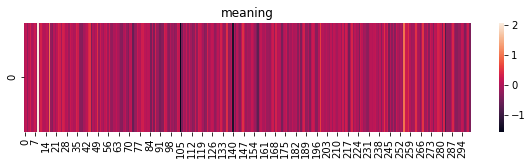

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_vector(word, nlp):
  """Plots a heatmap of a word vector"""
  doc_text = nlp(word)
  fig, ax = plt.subplots(figsize=(10, 2))
  sns.heatmap([doc_text[0].vector], ax=ax)
  ax.set_title(doc_text[0].text)
  plt.show()

plot_word_vector("meaning", nlp_en)

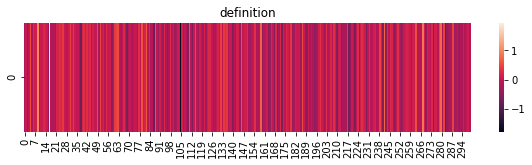

In [94]:
plot_word_vector("definition", nlp_en)

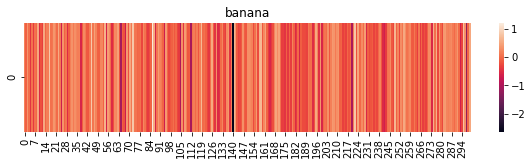

In [95]:
plot_word_vector("banana", nlp_en)

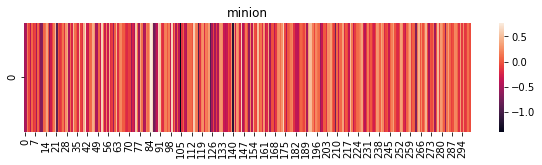

In [98]:
plot_word_vector("minion", nlp_en)

### Word Similarity

How do we compare two words? By ranking them in distance from one another.

A common distance measurement is Euclidean distance. Cosine similarity is an alternative measurement that just looks at direction, not magnitude. 

In [99]:
from scipy.spatial.distance import euclidean

# compare distance of vectors

In [ ]:
# get most similar words

In [ ]:
# get meaning of sentence, most similar words